 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

### IMPORTANT 1: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!


# IMPORTANT 2: Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb . Notebooks without name will be discarded.

**Student name**: Jawad Aisf<br>
**ID Number**: 2013002

# # 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [2]:
IDnumber = 2013002 #YOUR_ID , try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)


Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
# print(dataset[:10,...])

X = dataset[:,:-1].astype(float) #columns 0,1,2 contain the features
# print(X)
Y = dataset[:,-1].astype(int)   # last column contains the labels

# print(Y)
Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1



m = dataset.shape[0]
print(m)

print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation
print(permutation)

X = X[permutation]
# print(X)
Y = Y[permutation]
# print(Y)

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
200

Number of samples loaded: 200
[137 170 113  66 124 130 150 136  84  56  14  71  23 120 128  83  87  49
  31   5 190 118 151 171  27 182  15 112 149  80 122 127  77 160 139  41
  44  21 186  43  64   4  53  91 161 141 184 177  25 138  29  89  93 131
 110  88 114 152  82  99 188 111 164 157 143 148 103 107 183  54  22  78
  16 185 189 125  72  51 194 172  48  50  24 173  79  45 142   3  98 134
  86  97  74  34  18 108  36  73  40 117   1 156   9   6  70  69 187  90
 198  12 166 175  95  20 199  32 109 154  94  63  46  85 176  13  17 129
  58  67  68 168  11  39 146   7 102  37  59   0  75  60  61 162  10 132
  55   2  28 133 193  26 179  35  42 192 100 153 106  57 144 167  65 104
 119 196 169 115  76 135  52  30 163 181  19  81 116 140 191  96  47  62
 101 178 159 126  33 147  38   8 105 123 197  92 165 158 195 121 180 155
 174 145]


We are going to classify class "1" (metal) vs class "-1" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [4]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.


m_training = int((m*75)/100)

m_test = int((m*25)/100)
print(m_test)

X_training = X[0:m_training,:]
Y_training = Y[0:m_training]



X_test = X[m_training:m,:]
Y_test = Y[m_training:m]

print(Y_training) 
print(m_test)

print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

50
[ 1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1
 -1  1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1
 -1  1 -1 -1 -1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1
 -1  1  1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1
 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1  1  1 -1]
50

Number of classical instances in test: 16
Number of metal instances in test: 34
Shape of training set: (150, 3)
Shape of test set: (50, 3)


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [5]:
# Add a 1 to each sample (homogeneous coordinates)
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

print("Training set in homogeneous coordinates:")
print(X_training[:10])

Training set in homogeneous coordinates:
[[1.00000000e+00 1.07666016e+02 5.16928362e-01 3.40137358e+03]
 [1.00000000e+00 8.91029095e+01 4.26884734e-01 2.14160877e+03]
 [1.00000000e+00 1.43554688e+02 4.96368499e-01 2.79255875e+03]
 [1.00000000e+00 1.07666016e+02 3.09652754e-01 1.52561929e+03]
 [1.00000000e+00 1.07666016e+02 5.09240208e-01 2.70968208e+03]
 [1.00000000e+00 9.93840144e+01 5.33625514e-01 2.81548238e+03]
 [1.00000000e+00 1.35999178e+02 6.34761669e-01 3.40310190e+03]
 [1.00000000e+00 1.12347147e+02 5.55233165e-01 2.69957385e+03]
 [1.00000000e+00 1.12347147e+02 2.15063800e-01 1.36040835e+03]
 [1.00000000e+00 1.61499023e+02 3.87949211e-01 2.41193872e+03]]


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [6]:
#update rule used in the iterative algorithm
def perceptron_update(current_w, x, y):
    
    new_w=current_w+float(y)*x
    return new_w

def perceptron(X, Y, max_num_iterations):
    
    dim = int(Y.shape[0])
    curr_w = np.zeros(X.shape[1])
    best_w = np.zeros(X.shape[1])
    num_samples = dim
    best_error = 10000000000 
    
    
#      index_misclassified = -1 #will be ovewritten
#     num_misclassified = 0 #will be ovewritten
    
    
    index_misclassified = -2 
       #main loop continue until all samples correctly classified or max # iterations reached
 
    
    num_iter = 1
    
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
        
        num_misclassified = 0 #will be ovewritten
        permutation=np.random.permutation(num_samples)
        X=X[permutation]
        Y=Y[permutation]
        
        for i in range(num_samples):
            if (np.inner(curr_w,X[i,:])*Y[i]<=0): 
                index_misclassified = i
                break
         #update  error count, keep track of best solution
            
        curr_w=perceptron_update(curr_w,X[index_misclassified],Y[index_misclassified]) #update the current solution                  

        for i in range(num_samples):
            if (np.inner(curr_w,X[i,:])*Y[i]<=0):
                num_misclassified+=1
                
       
        if num_misclassified == 0:
            index_misclassified = -1
            
        curr_error=num_misclassified/num_samples
        
        if curr_error<best_error:
            best_error=curr_error
            best_w=curr_w
            
        num_iter += 1
        
    
    return best_w, best_error

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [7]:
#now run the perceptron for 100 iterations
w_found, error = perceptron(X_training,Y_training, 100)
print(w_found,"\n")
print("Training Error of perpceptron (100 iterations): " + str(error))

[-2.90000000e+01 -3.78759330e+03 -7.92242579e-01  2.37902996e+02] 

Training Error of perpceptron (100 iterations): 0.10666666666666667


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [8]:
#now use the w_found to make predictions on test dataset

prediction=np.zeros(m_test)
for i in range(Y_test.shape[0]):
    prediction[i]=np.sign(np.inner(w_found,X_test[i]))

print(prediction,"\n")

num_errors = 0
# PLACE YOUR CODE to compute the number of errors

for i in range(Y_test.shape[0]):
    if (prediction[i]!=Y_test[i]):
        num_errors+=1

true_loss_estimate = num_errors/m_test  
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))

[ 1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1.
 -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.
 -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1. -1.] 

Test Error of perpceptron (100 iterations): 0.14


# *TO DO*[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1** The result in both case are moreoless same and there is no huge amount of difference

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [9]:
#now run the perceptron for 4000 iterations here!
w_found, error = perceptron(X_training,Y_training, 4000)
print(w_found)
print("Training Error of perpceptron (4000 iterations): " + str(error))

# PLACE YOUR CODE



m = Y_test.shape[0]
Y_predict=np.zeros(m)
for i in range(Y_test.shape[0]):
    Y_predict[i]=np.sign(np.inner(w_found,X_test[i]))

# print(Y_predict)

num_errors = 0

for i in range(Y_test.shape[0]):
    if (Y_predict[i]!=Y_test[i]):
        num_errors+=1


true_loss_estimate = num_errors/m_test

print("Test Error of perpceptron (4000 iterations): " + str(true_loss_estimate))

[-1.31000000e+02 -1.50729483e+04 -2.04480253e+00  9.44205646e+02]
Training Error of perpceptron (4000 iterations): 0.1
Test Error of perpceptron (4000 iterations): 0.14


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2** After large number of iteration the test and training error decreases significanty but both true and training error are almost equal

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [10]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float)
Y = dataset[:,-1].astype(int)   

Y = 2*Y-1                        
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) 
# random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [11]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

m_training = int(0.75*m)
m_test = int(0.25*m)

X_training = X[0:m_training,:]
Y_training = Y[0:m_training]

X_test = X[m_training:m,:]
Y_test = Y[m_training:m]

print("Number of samples in the test set:", m_test)
print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("\nShape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

Number of samples in the test set: 50

Number of classical instances in test: 20
Number of metal instances in test: 30

Shape of training set: (150, 3)
Shape of test set: (50, 3)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [12]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

logreg.fit(X_training,Y_training)

predicted_training =logreg.predict(X_training)
print('predicted training', predicted_training)

error_rate_training = 0

for i in range(m_training):
    if(predicted_training[i]!=Y_training[i]):
        error_rate_training+=1
        

print("Error rate on training set:\n "+str(error_rate_training))

predicted_test= logreg.predict(X_test)
print('prediction on test \n', predicted_test)

error_rate_test = 0

for i in range(m_test):
    if(predicted_training[i]!=Y_test[i]):
        error_rate_test+=1

print("Error rate on test set: " + str(error_rate_test))

predicted training [-1  1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1 -1 -1  1 -1  1
  1 -1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1
  1  1  1  1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1
  1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1
 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1
  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1 -1
  1 -1  1  1  1 -1]
Error rate on training set:
 0
prediction on test 
 [ 1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1
 -1  1  1 -1  1 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1
 -1 -1]
Error rate on test set: 32


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [13]:
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']
index_feature1 = 1
index_feature2 = 2
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

print(feature_name0)
print(feature_name1)

X_reduced = X[:,features]

X_training = X_reduced[0:m_training,:]
Y_training = Y[0:m_training]

X_test = X_reduced[m_training:m,:]
Y_test = Y[m_training:m]

chroma_stft
spectral_centroid


Now learn a model using the training data and measure the performances.

In [14]:
# learning from training data
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_training,Y_training)

#predict on training set
predicted_training =logreg.predict(X_training)
print('predicted training', predicted_training)

#print the error rate on treaining set = fraction of misclassified samples
error_rate_training = 0

#count the number of errors in training set
for i in range(m_training):
    if(predicted_training[i]!=Y_training[i]):
        error_rate_training+=1
        

print('Error on training = '+str(error_rate_training))

#print the error rate on test set = fraction of misclassified samples
error_rate_test = 0

predicted_training =logreg.predict(X_test)
print('Prediction on test = ', predicted_test)

for i in range(m_test):
    if(predicted_training[i]!=Y_test[i]):
        error_rate_test+=1

print('Error on test set = ' + str(error_rate_test))

predicted training [-1  1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1 -1 -1  1 -1  1
  1 -1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1
  1  1  1  1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1
  1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1
 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1
  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1 -1
  1 -1  1  1  1 -1]
Error on training = 1
Prediction on test =  [ 1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1
 -1  1  1 -1  1 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1
 -1 -1]
Error on test set = 1


**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3** The Feature "tempo" and "chroma_sfts" show and eror that was considerable and the error between "chroma_sfts" and "spectral_centroid" is 0 so i selected spectral_centroid and chroma_sfts

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

C:\Users\urjaw\AppData\Local\Temp/ipykernel_9284/2751404703.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


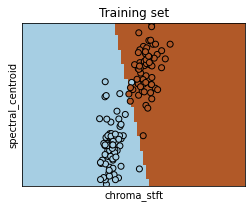

C:\Users\urjaw\AppData\Local\Temp/ipykernel_9284/2751404703.py:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


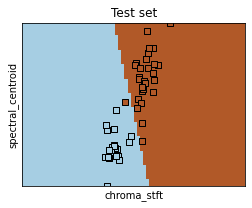

In [15]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [16]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [17]:
#Import Data: Load the data from a .csv file

filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

#A quick overview of data, to inspect the data you can use the method describe()

dataDescription = stats.describe(Data)
print(dataDescription)
print ("Shape of data array: " + str(Data.shape))


#for more interesting visualization: use Panda!

DescribeResult(nobs=500, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00, 5.0000e+01]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([3.65578576e+00, 1.15000000e+01, 1.11317400e+01, 7.00000000e-02,
       5.54451400e-01, 6.28297000e+00, 6.84246000e+01, 3.81193180e+00,
       9.64200000e+00, 4.09624000e+02, 1.84286000e+01, 3.56208040e+02,
       1.26987400e+01, 2.25680000e+02]), variance=array([7.47252195e+01, 5.48905812e+02, 4.76198228e+01, 6.52304609e-02,
       1.35838329e-02, 4.97618330e-01, 7.99314163e+02, 4.46304043e+00,
       7.59617595e+01, 2.85605197e+04, 4.67663531e+00, 8.41657137e+03,
       5.13361942e+01, 8.52982926e+03]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0

# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [18]:
#get number of total samples
num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)

m_t = int(num_total_samples*.7)

print ("Cardinality of Training Set: ", m_t)

#shuffle the data
np.random.shuffle(Data)

#training data 

X_training = Data[0:m_t,0:12]
Y_training = Data[0:m_t,13]



print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)

#test data, to be used to estimate the true loss of the final model(s)
X_test = Data[m_t:num_total_samples,0:12]
Y_test = Data[m_t:num_total_samples,13]



print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)

Total number of samples:  500
Cardinality of Training Set:  350
Training input data size:  (350, 12)
Training output data size:  (350,)
Test input data size:  (150, 12)
Test output data size:  (150,)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [19]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [-0. -0.  0. -0.  0.  0.  0.  0. -0. -0.  0.  0.]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the test input data: [ 0.02759398 -0.03568149  0.09206957 -0.0544767  -0.05745791 -0.07766888
 -0.02742789  0.03503669 -0.03077102  0.02449392  0.00607913 -0.00057712]
Std of the test input data: [1.07049494 1.04469979 0.95959638 0.90562503 0.90189912 0.91463111
 1.03453929 1.01244973 0.9796826  0.94435847 0.92465927 1.01665952]


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [20]:
#compute linear regression coefficients for training data

#add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
m_training = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)),X_training)) # H: in homogeneous coordinates

m_test = X_test.shape[0]
X_testH = np.hstack((np.ones((m_test,1)),X_test))  # H: in homogeneous coordinates

# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr =  np.linalg.lstsq(X_trainingH, Y_training,True)
print('Coefficient', w_np)

# compute Residual sums of squares by hand
prediction_training = np.dot(X_trainingH, np.transpose(w_np))
RSStr_hand = np.linalg.norm((Y_training-prediction_training))**2
print('RSS_hand', RSStr_hand)

print("RSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)

Coefficient [226.46       -15.0944499   10.34915671  -8.94706882   8.12719404
 -22.45149006  40.09136864 -13.31825944 -38.32483043  27.74168187
 -23.48629926 -18.72418585  14.21789489]
RSS_hand 972174.0913083735
RSS with numpy lstsq:  [972174.09130837]
Empirical risk with numpy lstsq: [2777.64026088]


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [21]:
#compute predictions on test
prediction_test = np.dot(X_testH, np.transpose(w_np))

# compute Residual sums of squares
RSS_test = np.linalg.norm((Y_test-prediction_test))**2

print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

RSS on test data: 389259.3031219411
Loss estimated from test data: 2595.062020812941


### QUESTION 4: Comment on the results you get and on the difference between the train and test errors.

I think predictor willoverfit data because the error on test data is more larger than training data and this is not efficient predictor.

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [22]:
from sklearn.linear_model import LinearRegression

# build the LinearRegression() model and train it
LinReg = LinearRegression().fit(X_training,Y_training)

print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)

Y_training_predicted=LinReg.predict(X_training)
print('Prediction on trainning'+str(Y_training_predicted[0:10]))

Y_test_predicted=LinReg.predict(X_test)
print('Prediction on test'+str(Y_test_predicted[0:10]))

# return a prediction score based on the coefficient of determination
print("Measure on training data:", 1-LinReg.score(X_training, Y_training))

Intercept: 226.4600000000002
Least-Squares Coefficients: [-15.0944499   10.34915671  -8.94706882   8.12719404 -22.45149006
  40.09136864 -13.31825944 -38.32483043  27.74168187 -23.48629926
 -18.72418585  14.21789489]
Prediction on trainning[251.42300782 337.67304189 369.01705195 218.65395438 330.02435274
 279.92766551 175.78409152 154.45853745 211.91217398 195.4364301 ]
Prediction on test[259.78683613 366.6680769  203.76747411 249.0434881  207.62005711
 256.00049065 240.20124041 326.43980425 213.62044009 208.16048165]
Measure on training data: 0.32075373875248414
